## Import Data

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast
import csv
import re
from io import StringIO
import numpy as np
import pandas as pd

new_dir = "C:\\Users\\maor9"
os.chdir(new_dir)

current_dir = os.getcwd()
print(f"Directory successfully changed to: {current_dir}")

Directory successfully changed to: C:\Users\maor9


# Decoded files 


## Malware

In [8]:


# Define the file path

def handle_malware():
    file_path = "CSV_malware.csv"

    # Open the CSV file with universal newline support
    import pandas as pd

    # Initialize an empty list to store row dictionaries
    rows_list = []

    index = 1
    import ast
    import pandas as pd


    def convert_line(line: str) -> str:
        def replace_commas_in_brackets(match):
            """Replaces commas inside lists or dictionaries with '#'"""
            return match.group(0).replace(',', '#')

        # Regular expressions for lists and dictionaries
        list_pattern = r'\[.*?\]'
        dict_pattern = r'\{.*?\}'

        # Replace commas in lists
        line = re.sub(list_pattern, replace_commas_in_brackets, line)

        # Replace commas in dictionaries
        line = re.sub(dict_pattern, replace_commas_in_brackets, line)

        return line


    # Initialize an empty list to store row dictionaries
    rows_list = []

    st_line = """US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,nan,0,4277 days, 21:07:56.450015,2.9631196533066344,6.0,['abuse@name.com'# 'roxics@gmail.com'],2008-08-04 04:20:05,Scape Films,defaultdict(<class 'int'># {'d': 1# 'n': 1# 'a': 1# 'i': 2# 'r': 1# 'h': 1# 'c': 1# 'o': 1# 'p': 1}),['di'# 'ic'# 'cr'# 'ro'# 'op'# 'ph'# 'ha'# 'an'# 'ni'],MI,0,US,-1.0,0,0,['d'# 'i'# 'c'# 'r'# 'o'# 'p'# 'h'# 'a'# 'n'# 'i'],11,[('apple.com'# 86)# ('adobe.com'# 86)],com,-1.0,Name.com# Inc.,0,-1.0,['dic'# 'icr'# 'cro'# 'rop'# 'oph'# 'pha'# 'han'# 'ani'],0.0,0"""
    st_line.split(",")

    headers = [
        'Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name',
        'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age','Domain_Age_Time', 'entropy',
        'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution',
        '2gram', 'State', 'oc_32', 'Country_Duplicate', 'Page_Rank', 'hex_8', 'dec_8', '1gram',
        'len', 'typos', 'tld', 'shortened', 'Registrar', 'obfuscate_at_sign','', 'Alexa_Rank',
        '3gram', 'numeric_percentage', 'puny_coded'
    ]

    all_rows = []
    # Open the CSV file
    index = 1
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the header line and split it into column names
        # headers = file.readline()

        # Iterate over each subsequent line in the file
        for line_number, line in enumerate(file, start=2):

            if (index==1):
                index += 1
                continue
            index += 1

            # Split the line into individual fields
            fields = line.strip()
            if (fields.find("S.L.")>0):
                print('a')
            fields = fields.replace(", Inc.","~~~~")
            fields = fields.replace(", INC.", "~~~!")
            fields = fields.replace(", Incorporated", "~~~!")
            fields = fields.replace(", LLC", "$$$$")
            fields = fields.replace(", Ltd", "!!!!")
            fields = fields.replace(",Ltd.", "!!!!")
            fields = fields.replace(", S.L.", "!!~~")
            fields = fields.replace(", LTD", "!!!~")



            f = convert_line(fields)
            arr = f.split(',')
            new_arr = []
            for x in arr:
                x=x.replace('#', ',')
                x = x.replace('~~~~', ', Inc.')
                x = x.replace('~~~!', ', INC.')
                x = x.replace('$$$$', ', LLC')
                x = x.replace('!!!!', ', Ltd')
                x = x.replace('!!!~', ', LTD')
                x = x.replace("!!~~",", S.L.")

                new_arr.append(x)


            # if (len(new_arr)<40):
            #     print(new_arr)
            #     continue
            result_dict = dict(zip(headers, new_arr))
            if (result_dict['Domain_Age']=="0" or str(result_dict['Domain_Age'])=='nan'):
                new_arr.insert(13, '-')
                # new_arr.insert(14, '-')

                result_dict = dict(zip(headers, new_arr))

                # continue
            all_rows.append(result_dict)

    df_malware =pd.DataFrame(all_rows)

    return df_malware
    #print(df_malware)

df_malware=handle_malware()

a
a
a
a
a
a
a
a
a


In [285]:
df_malware.head()
#df_malware['Emails'].unique()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,...,tld,shortened,Registrar,obfuscate_at_sign,,Alexa_Rank,3gram,numeric_percentage,puny_coded,source
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,...,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,"Name.com, Inc.",0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'ha...",0.0,0,malware
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,...,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.0,0,malware
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,...,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'je...",0.0,0,malware
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,...,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111111111109,0,malware
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,...,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn',...",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111111111109,0,malware


## Spam

In [14]:

def handle_spam():
    file_path = "CSV_spam.csv"

    # Open the CSV file with universal newline support
    import pandas as pd

    # Initialize an empty list to store row dictionaries
    rows_list = []

    index = 1
    import ast
    import pandas as pd

    def convert_line(line: str) -> str:
        def replace_commas_in_brackets(match):
            """Replaces commas inside lists or dictionaries with '#'"""
            return match.group(0).replace(',', '#')

        # Regular expressions for lists and dictionaries
        list_pattern = r'\[.*?\]'
        dict_pattern = r'\{.*?\}'

        # Replace commas in lists
        line = re.sub(list_pattern, replace_commas_in_brackets, line)

        # Replace commas in dictionaries
        line = re.sub(dict_pattern, replace_commas_in_brackets, line)

        return line

    # Initialize an empty list to store row dictionaries
    rows_list = []

    st_line = """US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,nan,0,4277 days, 21:07:56.450015,2.9631196533066344,6.0,['abuse@name.com'# 'roxics@gmail.com'],2008-08-04 04:20:05,Scape Films,defaultdict(<class 'int'># {'d': 1# 'n': 1# 'a': 1# 'i': 2# 'r': 1# 'h': 1# 'c': 1# 'o': 1# 'p': 1}),['di'# 'ic'# 'cr'# 'ro'# 'op'# 'ph'# 'ha'# 'an'# 'ni'],MI,0,US,-1.0,0,0,['d'# 'i'# 'c'# 'r'# 'o'# 'p'# 'h'# 'a'# 'n'# 'i'],11,[('apple.com'# 86)# ('adobe.com'# 86)],com,-1.0,Name.com# Inc.,0,-1.0,['dic'# 'icr'# 'cro'# 'rop'# 'oph'# 'pha'# 'han'# 'ani'],0.0,0"""
    st_line.split(",")

    # arr = "Country,ASN,TTL,IP,Domain,sld,State,typos,oc_32,len,puny_coded,shortened,dec_32,Registrant_Name,3gram,Organization,Page_Rank,tld,Registrar,oc_8,subdomain,Country,char_distribution,1gram,longest_word,Name_Server_Count,Alexa_Rank,hex_32,hex_8,dec_8,obfuscate_at_sign,Creation_Date_Time,numeric_percentage,Emails,2gram,entropy,Domain_Age,Domain_Name".split(",")
    headers = ['Country_A', 'ASN', 'TTL', 'IP', 'Domain', 'sld', 'State', 'typos',
               'oc_32', 'len', 'puny_coded', 'shortened', 'dec_32', 'Registrant_Name',
               '3gram', 'Organization', 'Page_Rank', 'tld', 'Registrar', 'oc_8', 'subdomain',
               'Country', 'char_distribution', '1gram', 'longest_word', 'Name_Server_Count', 'Alexa_Rank',
               'hex_32', 'hex_8', 'dec_8', 'obfuscate_at_sign', 'Creation_Date_Time', 'numeric_percentage',
               'Emails', '2gram', 'entropy', 'Domain_Age', 'Domain_Name']

    all_rows = []
    # Open the CSV file
    index = 1
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the header line and split it into column names
        # headers = file.readline()

        # Iterate over each subsequent line in the file
        for line_number, line in enumerate(file, start=2):

            if (index == 1):
                index += 1
                continue
            index += 1

            # Split the line into individual fields
            fields = line.strip()
            if (fields.find("S.L.") > 0):
                print('a')
            fields = fields.replace(", Inc.", "~~~~")
            fields = fields.replace(", INC.", "~~~!")
            fields = fields.replace(", Incorporated", "~~~!")
            fields = fields.replace(", LLC", "$$$$")
            fields = fields.replace(", Ltd", "!!!!")
            fields = fields.replace(",Ltd.", "!!!!")
            fields = fields.replace(", S.L.", "!!~~")
            fields = fields.replace(", LTD", "!!!~")

            f = convert_line(fields)
            arr = f.split(',')
            new_arr = []
            for x in arr:
                x = x.replace('#', ',')
                x = x.replace('~~~~', ', Inc.')
                x = x.replace('~~~!', ', INC.')
                x = x.replace('$$$$', ', LLC')
                x = x.replace('!!!!', ', Ltd')
                x = x.replace('!!!~', ', LTD')
                x = x.replace("!!~~", ", S.L.")

                new_arr.append(x)

            result_dict = dict(zip(headers, new_arr))
            if (result_dict['Domain_Age'] == "0" or str(result_dict['Domain_Age']) == 'nan'):
                new_arr.insert(13, '-')
                result_dict = dict(zip(headers, new_arr))

            if ( str(result_dict['Domain_Name']) == 'nan'):
                new_arr.pop(11)
                result_dict = dict(zip(headers, new_arr))

            if (str(result_dict['dec_32']) == 'nan'):
                new_arr.insert(12,'-')

            new_arr.pop(22)
            result_dict = dict(zip(headers, new_arr))
                # continue
            all_rows.append(result_dict)

    df_spam = pd.DataFrame(all_rows)
    return df_spam
    #print(df_spam)



df_spam=handle_spam()


In [20]:
df_spam.head()


,Country_A,ASN,TTL,IP,Domain,sld,State,typos,oc_32,len,...,hex_8,dec_8,obfuscate_at_sign,Creation_Date_Time,numeric_percentage,Emails,2gram,entropy,Domain_Age,Domain_Name
0,JP,2516.0,59,119.82.155.98,b'0900259.com.',0900259,Tokyo,"[('qq.com', 86), ('vk.com', 86)]",0,8,...,0,0,0,2019-06-11 12:32:01,53.846153846153854,"['abuse@gmo.jp', 'proxy@whoisprotectservice.com']","['09', '90', '00', '02', '25', '59']",1.7806390622295662,314 days,9:34:59.143460
1,JP,2519.0,3599,116.91.115.130,b'koitera.net.',koitera,Tokyo,"[('php.net', 86), ('a8.net', 86)]",0,8,...,0,0,0,2019-06-11 12:31:48,0.0,"['abuse@gmo.jp', 'proxy@whoisprotectservice.com']","['ko', 'oi', 'it', 'te', 'er', 'ra']",2.625,314 days,9:35:13.310505
2,JP,2519.0,3599,116.91.115.130,b'koitera.com.',koitera,Tokyo,"[('qq.com', 86), ('vk.com', 86)]",0,8,...,0,0,0,2016-04-21 04:43:31,0.0,"['abuse@gmo.jp', 'proxy@whoisprotectservice.com']","['ko', 'oi', 'it', 'te', 'er', 'ra']",2.625,1460 days,17:23:31.309635
3,JP,2519.0,3599,116.91.115.130,b'pc.koitera.com.',koitera,Tokyo,"[('qq.com', 86), ('vk.com', 86)]",0,10,...,0,0,0,2016-04-21 04:43:31,0.0,"['abuse@gmo.jp', 'proxy@whoisprotectservice.com']","['ko', 'oi', 'it', 'te', 'er', 'ra']",2.9897352853986265,1460 days,17:23:32.359161
4,JP,2516.0,59,119.82.155.97,b'0901360.com.',0901360,Tokyo,"[('qq.com', 86), ('vk.com', 86)]",0,8,...,0,0,0,2019-06-11 12:31:51,53.846153846153854,"['abuse@gmo.jp', 'proxy@whoisprotectservice.com']","['09', '90', '01', '13', '36', '60']",2.0306390622295662,314 days,9:35:13.357891


## Phishing

In [22]:
def handle_phishing():
    file_path = "CSV_phishing.csv"

    # Open the CSV file with universal newline support
    import pandas as pd

    # Initialize an empty list to store row dictionaries
    rows_list = []

    index = 1
    import ast
    import pandas as pd

    def convert_line(line: str) -> str:
        def replace_commas_in_brackets(match):
            """Replaces commas inside lists or dictionaries with '#'"""
            return match.group(0).replace(',', '#')

        # Regular expressions for lists and dictionaries
        list_pattern = r'\[.*?\]'
        dict_pattern = r'\{.*?\}'

        # Replace commas in lists
        line = re.sub(list_pattern, replace_commas_in_brackets, line)

        # Replace commas in dictionaries
        line = re.sub(dict_pattern, replace_commas_in_brackets, line)

        return line

    # Initialize an empty list to store row dictionaries
    rows_list = []

    st_line = """US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,nan,0,4277 days, 21:07:56.450015,2.9631196533066344,6.0,['abuse@name.com'# 'roxics@gmail.com'],2008-08-04 04:20:05,Scape Films,defaultdict(<class 'int'># {'d': 1# 'n': 1# 'a': 1# 'i': 2# 'r': 1# 'h': 1# 'c': 1# 'o': 1# 'p': 1}),['di'# 'ic'# 'cr'# 'ro'# 'op'# 'ph'# 'ha'# 'an'# 'ni'],MI,0,US,-1.0,0,0,['d'# 'i'# 'c'# 'r'# 'o'# 'p'# 'h'# 'a'# 'n'# 'i'],11,[('apple.com'# 86)# ('adobe.com'# 86)],com,-1.0,Name.com# Inc.,0,-1.0,['dic'# 'icr'# 'cro'# 'rop'# 'oph'# 'pha'# 'han'# 'ani'],0.0,0"""
    st_line.split(",")

    # arr = "Country_A,ASN,TTL,IP,Domain,Name_Server_Count,Domain_Age,entropy,hex_8,numeric_percentage,1gram,typos,tld,char_distribution,subdomain,puny_coded,Organization,Country,longest_word,dec_8,dec_32,Registrant_Name,sld,shortened,2gram,oc_8,State,Registrar,hex_32,Page_Rank,oc_32,Alexa_Rank,len,obfuscate_at_sign,Emails,3gram,Domain_Name,Creation_Date_Time".split(",")
    headers = ['Country_A', 'ASN', 'TTL', 'IP', 'Domain', 'Name_Server_Count',
               'Domain_Age','Domain_Age_Time', 'entropy', 'hex_8', 'numeric_percentage', '1gram',
               'typos', 'tld', 'char_distribution', 'subdomain', 'puny_coded',
               'Organization', 'Country', 'longest_word', 'dec_8', 'dec_32', 'Registrant_Name',
               'sld', 'shortened', '2gram', 'oc_8', 'State', 'Registrar', 'hex_32', 'Page_Rank',
               'oc_32', 'Alexa_Rank', 'len', 'obfuscate_at_sign', 'Emails', '3gram', 'Domain_Name',
               'Creation_Date_Time']

    all_rows = []
    # Open the CSV file
    index = 1
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the header line and split it into column names
        # headers = file.readline()

        # Iterate over each subsequent line in the file
        for line_number, line in enumerate(file, start=2):

            if (index == 1):
                index += 1
                continue
            index += 1

            # Split the line into individual fields
            fields = line.strip()
            if (fields.find("S.L.") > 0):
                print('a')
            fields = fields.replace(", Inc.", "~~~~")
            fields = fields.replace(", INC.", "~~~!")
            fields = fields.replace(", Incorporated", "~~~!")
            fields = fields.replace(", LLC", "$$$$")
            fields = fields.replace(", Ltd", "!!!!")
            fields = fields.replace(",Ltd.", "!!!!")
            fields = fields.replace(", S.L.", "!!~~")
            fields = fields.replace(", LTD", "!!!~")

            f = convert_line(fields)
            arr = f.split(',')
            new_arr = []
            for x in arr:
                x = x.replace('#', ',')
                x = x.replace('~~~~', ', Inc.')
                x = x.replace('~~~!', ', INC.')
                x = x.replace('$$$$', ', LLC')
                x = x.replace('!!!!', ', Ltd')
                x = x.replace('!!!~', ', LTD')
                x = x.replace("!!~~", ", S.L.")

                new_arr.append(x)


            result_dict = dict(zip(headers, new_arr))
            if (result_dict['Domain_Age'] == "0" or str(result_dict['Domain_Age']) == 'nan'):
                new_arr.insert(6, '-')
                result_dict = dict(zip(headers, new_arr))

            if (str(result_dict['Domain_Name']) == 'nan'):
                new_arr.pop(11)
                result_dict = dict(zip(headers, new_arr))

            new_arr.pop(14)
            #
            # if (str(result_dict['dec_32']) == 'nan'):
            #     new_arr.insert(12, '-')


            result_dict = dict(zip(headers, new_arr))
            # continue
            all_rows.append(result_dict)

    df_phishing = pd.DataFrame(all_rows)
    return df_phishing
    print(df_phishing)

df_phishing=handle_phishing()

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [24]:
df_phishing.head()

,Country_A,ASN,TTL,IP,Domain,Name_Server_Count,Domain_Age,Domain_Age_Time,entropy,hex_8,...,hex_32,Page_Rank,oc_32,Alexa_Rank,len,obfuscate_at_sign,Emails,3gram,Domain_Name,Creation_Date_Time
0,NL,204915.0,2,145.14.145.41,b'programafidelidadeitacard2.cf.',0.0,-,0,3.4262096139809795,0,...,0,-1.0,0,-1.0,27,0,nan,"['pro', 'rog', 'ogr', 'gra', 'ram', 'ama', 'ma...",nan,nan
1,nan,nan,31,nan,b'programafidelidadeitacard2.cf.',0.0,-,0,3.4262096139809795,0,...,0,-1.0,0,-1.0,27,0,nan,"['pro', 'rog', 'ogr', 'gra', 'ram', 'ama', 'ma...",nan,nan
2,US,46606.0,14399,192.185.222.90,b'professorjosesilveira.com.',4.0,1735 days,23:54:04.131042,3.1537909765860377,0,...,0,-1.0,0,-1.0,22,0,"['abuse-contact@publicdomainregistry.com', 'jo...","['pro', 'rof', 'ofe', 'fes', 'ess', 'sso', 'so...",PROFESSORJOSESILVEIRA.COM,2015-07-21 11:49:15
3,PL,198414.0,14399,91.234.146.162,b'www.ksylitol.com.',4.0,5117 days,0:37:18.475051,2.723308333814104,0,...,0,-1.0,0,-1.0,12,0,"['abuse@netart-registrar.com', 'wpbpifqxoouo-r...","['ksy', 'syl', 'yli', 'lit', 'ito', 'tol']","['KSYLITOL.COM', 'ksylitol.com']",2006-04-18 11:06:02
4,PL,198414.0,14399,91.234.146.162,b'www.ksylitol.com.',4.0,5117 days,0:37:19.474684,2.723308333814104,0,...,0,-1.0,0,-1.0,12,0,"['abuse@netart-registrar.com', 'wpbpifqxoouo-r...","['ksy', 'syl', 'yli', 'lit', 'ito', 'tol']","['KSYLITOL.COM', 'ksylitol.com']",2006-04-18 11:06:02


## Benign

In [26]:

def handle_benign():
    file_path = "CSV_benign.csv"

    # Open the CSV file with universal newline support
    import pandas as pd

    # Initialize an empty list to store row dictionaries
    rows_list = []

    index = 1
    import ast
    import pandas as pd

    def convert_line(line: str) -> str:
        def replace_commas_in_brackets(match):
            """Replaces commas inside lists or dictionaries with '#'"""
            return match.group(0).replace(',', '#')

        # Regular expressions for lists and dictionaries
        list_pattern = r'\[.*?\]'
        dict_pattern = r'\{.*?\}'

        # Replace commas in lists
        line = re.sub(list_pattern, replace_commas_in_brackets, line)

        # Replace commas in dictionaries
        line = re.sub(dict_pattern, replace_commas_in_brackets, line)

        return line

    # Initialize an empty list to store row dictionaries
    rows_list = []

    st_line = """US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,nan,0,4277 days, 21:07:56.450015,2.9631196533066344,6.0,['abuse@name.com'# 'roxics@gmail.com'],2008-08-04 04:20:05,Scape Films,defaultdict(<class 'int'># {'d': 1# 'n': 1# 'a': 1# 'i': 2# 'r': 1# 'h': 1# 'c': 1# 'o': 1# 'p': 1}),['di'# 'ic'# 'cr'# 'ro'# 'op'# 'ph'# 'ha'# 'an'# 'ni'],MI,0,US,-1.0,0,0,['d'# 'i'# 'c'# 'r'# 'o'# 'p'# 'h'# 'a'# 'n'# 'i'],11,[('apple.com'# 86)# ('adobe.com'# 86)],com,-1.0,Name.com# Inc.,0,-1.0,['dic'# 'icr'# 'cro'# 'rop'# 'oph'# 'pha'# 'han'# 'ani'],0.0,0"""
    st_line.split(",")

    # arr = "Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank".split(",")
    headers = ['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State',
               'Registrant_Name', 'Country', 'Creation_Date_Time',
               'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank',
               'subdomain', 'Organization', 'len', 'longest_word' ,
               'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age','Domain_Age_Time',
               'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage',
               'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution',
               '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank']

    all_rows = []
    # Open the CSV file
    index = 1
    with open(file_path, 'r', encoding='utf-8') as file:
        # Read the header line and split it into column names
        # headers = file.readline()

        # Iterate over each subsequent line in the file
        for line_number, line in enumerate(file, start=2):

            if (index == 1):
                index += 1
                continue
            index += 1

            # Split the line into individual fields
            fields = line.strip()
            if (fields.find("S.L.") > 0):
                print('a')
            fields = fields.replace(", Inc.", "~~~~")
            fields = fields.replace(", INC.", "~~~!")
            fields = fields.replace(", Incorporated", "~~~!")
            fields = fields.replace(", LLC", "$$$$")
            fields = fields.replace(", Ltd", "!!!!")
            fields = fields.replace(",Ltd.", "!!!!")
            fields = fields.replace(", S.L.", "!!~~")
            fields = fields.replace(", LTD", "!!!~")

            f = convert_line(fields)
            arr = f.split(',')
            new_arr = []
            for x in arr:
                x = x.replace('#', ',')
                x = x.replace('~~~~', ', Inc.')
                x = x.replace('~~~!', ', INC.')
                x = x.replace('$$$$', ', LLC')
                x = x.replace('!!!!', ', Ltd')
                x = x.replace('!!!~', ', LTD')
                x = x.replace("!!~~", ", S.L.")

                new_arr.append(x)

            # if (len(new_arr)<40):
            #     print(new_arr)
            #     continue
            result_dict = dict(zip(headers, new_arr))
            if (result_dict['Domain_Age'] == "0" or str(result_dict['Domain_Age']) == 'nan'):
                new_arr.insert(13, '-')
                # new_arr.insert(14, '-')

                result_dict = dict(zip(headers, new_arr))

            if ( str(result_dict['Domain_Name']) == 'nan'):
                new_arr.pop(11)
                # new_arr.insert(13, '-')

                result_dict = dict(zip(headers, new_arr))


                # continue
            all_rows.append(result_dict)

    df_benign = pd.DataFrame(all_rows)
    return df_benign
    #print(df_benign)

df_benign=handle_benign()

a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [30]:
df_benign.head()

df_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Country             500001 non-null  object
 1   ASN                 500001 non-null  object
 2   TTL                 500001 non-null  object
 3   IP                  500001 non-null  object
 4   Domain              500001 non-null  object
 5   State               500001 non-null  object
 6   Registrant_Name     500001 non-null  object
 7   Creation_Date_Time  500001 non-null  object
 8   hex_32              500001 non-null  object
 9   hex_8               500001 non-null  object
 10  Domain_Name         500001 non-null  object
 11  Alexa_Rank          500001 non-null  object
 12  subdomain           500001 non-null  object
 13  Organization        500001 non-null  object
 14  len                 500001 non-null  object
 15  longest_word        500001 non-null  object
 16  oc

In [822]:
df_benign.head()

,Country,TTL,IP,Domain,State,Registrant_Name,Creation_Date_Time,hex_32,hex_8,Domain_Name,...,puny_coded,typos,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,source
0,US,46,172.217.1.174,b'google.com.',CA,NaN,15/09/1997 04:00,0,0,['GOOGLE.COM',...,8256 days,11:53:49.631067,0,0,['abusecomplaints@markmonitor.com','whoisrequest@markmonitor.com'],0,0,[('google.com',benign
1,NaN,299,NaN,b'google.com.',CA,NaN,15/09/1997 04:00,0,0,['GOOGLE.COM',...,8256 days,11:53:50.479085,0,0,['abusecomplaints@markmonitor.com','whoisrequest@markmonitor.com'],0,0,[('google.com',benign
2,NaN,38,NaN,b'www.google.com.',NaN,NaN,15/09/1997 04:00,0,0,GOOGLE.COM,...,11:53:51.264191,com,0,abusecomplaints@markmonitor.com,0,0,[('google.com',100),('google.com.br',benign
3,US,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,0,0,NaN,...,com,0,NaN,0,0,[('google.com',100),('google.com.br',95)],benign
4,NaN,96,NaN,b'facebook.com.',CA,NaN,29/03/1997 05:00,0,0,FACEBOOK.COM,...,0,2.59548889,10:53:52.505111,com,0,0,['abusecomplaints@registrarsafe.com','domain@fb.com'],0,benign


## Preprocessing

In [36]:
df_malware["source"] = "malware"
df_spam["source"] = "spam"
df_phishing["source"] = "phishing"
df_benign["source"] = "benign"

In [38]:


common_columns = set(df_benign.columns) & set(df_malware.columns) & set(df_spam.columns) & set(df_phishing.columns)

df_benign_filtered = df_benign[list(common_columns)]
df_malware_filtered = df_malware[list(common_columns)]
df_spam_filtered = df_spam[list(common_columns)]
df_phishing_filtered = df_phishing[list(common_columns)]

print("Common columns across all DataFrames:", common_columns)

print(df_benign_filtered.head())
print(df_malware_filtered.head())
print(df_spam_filtered.head())
print(df_phishing_filtered.head())




Common columns across all DataFrames: {'Domain_Age', 'dec_8', 'Country', 'char_distribution', 'entropy', 'Domain_Name', 'source', 'Name_Server_Count', 'Registrar', 'Alexa_Rank', 'obfuscate_at_sign', '2gram', 'Domain', 'shortened', 'hex_32', '3gram', 'sld', 'oc_32', 'oc_8', 'Emails', 'TTL', 'hex_8', 'Organization', 'Page_Rank', 'longest_word', 'subdomain', 'dec_32', 'ASN', 'tld', 'len', 'State', 'typos', '1gram', 'Creation_Date_Time', 'IP', 'puny_coded', 'Registrant_Name', 'numeric_percentage'}
  Domain_Age dec_8 Country                           char_distribution  \
0  8256 days     0      US                   defaultdict(<class 'int'>   
1  8256 days     0      US                   defaultdict(<class 'int'>   
2  8256 days     0     nan                   defaultdict(<class 'int'>   
3        nan     0     nan   {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})   
4  8426 days     0      US                   defaultdict(<class 'int'>   

              entropy                   Domain_Name  sou

In [61]:
df_combined = pd.concat([df_benign_filtered, df_malware_filtered, df_spam_filtered, df_phishing_filtered], ignore_index=True)

# Step 4: Display the first few rows
print(df_combined)
df_combined.to_csv("combined_data.csv", index=False, encoding="utf-8")
print("Data successfully saved as 'combined_data.csv'")


       Domain_Age dec_8 Country  \
0       8256 days     0      US   
1       8256 days     0      US   
2       8256 days     0     nan   
3             nan     0     nan   
4       8426 days     0      US   
...           ...   ...     ...   
514335  9246 days     0      US   
514336  9246 days     0      US   
514337  9246 days     0      US   
514338  9246 days     0      US   
514339  9246 days     0      US   

                                        char_distribution             entropy  \
0                               defaultdict(<class 'int'>  1.8348756474779464   
1                               defaultdict(<class 'int'>  1.8348756474779464   
2                               defaultdict(<class 'int'>  2.1142465351822795   
3               {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})  2.1142465351822795   
4                               defaultdict(<class 'int'>  2.5954888901709436   
...                                                   ...                 ...   
514335   {'v

In [42]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514340 entries, 0 to 514339
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Domain_Age          514340 non-null  object
 1   dec_8               514340 non-null  object
 2   Country             514340 non-null  object
 3   char_distribution   514340 non-null  object
 4   entropy             514340 non-null  object
 5   Domain_Name         514340 non-null  object
 6   source              514340 non-null  object
 7   Name_Server_Count   514340 non-null  object
 8   Registrar           514340 non-null  object
 9   Alexa_Rank          514340 non-null  object
 10  obfuscate_at_sign   514340 non-null  object
 11  2gram               514340 non-null  object
 12  Domain              514340 non-null  object
 13  shortened           514340 non-null  object
 14  hex_32              514340 non-null  object
 15  3gram               514340 non-null  object
 16  sl

In [116]:
df_combined['Malicious'] = df_combined['source'].apply(lambda x: 0 if x == 'benign' else 1)

print(df_combined.head())

  Domain_Age dec_8 Country                           char_distribution  \
0  8256 days     0      US                   defaultdict(<class 'int'>   
1  8256 days     0      US                   defaultdict(<class 'int'>   
2  8256 days     0     nan                   defaultdict(<class 'int'>   
3    Unknown     0     nan   {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})   
4  8426 days     0      US                   defaultdict(<class 'int'>   

              entropy                   Domain_Name  source Name_Server_Count  \
0  1.8348756474779464  ['GOOGLE.COM', 'google.com']  benign            google   
1  1.8348756474779464  ['GOOGLE.COM', 'google.com']  benign            google   
2  2.1142465351822795                    GOOGLE.COM  benign            google   
3  2.1142465351822795                           nan  benign               nan   
4  2.5954888901709436                  FACEBOOK.COM  benign          facebook   

                                    Registrar Alexa_Rank  ... Domain

In [118]:
df_combined['Malicious'].value_counts()

Malicious
0    441787
1     11760
Name: count, dtype: int64

#### AGE

In [66]:
df_combined["Domain_Age"].value_counts()

Domain_Age
Unknown       144393
1493 days        892
314 days         352
409 days         281
637 days         270
               ...  
9837 days          1
10471 days         1
9961 days          1
9526 days          1
9769 days          1
Name: count, Length: 10369, dtype: int64

In [64]:
df_combined.loc[~df_combined["Domain_Age"].str.contains("days", na=False), "Domain_Age"] = "Unknown"


In [84]:
df_combined['Domain_Age']

0         8256 days
1         8256 days
2         8256 days
3           Unknown
4         8426 days
            ...    
514335    9246 days
514336    9246 days
514337    9246 days
514338    9246 days
514339    9246 days
Name: Domain_Age, Length: 514340, dtype: object

#### Domain_Age

In [86]:
df_combined["Domain_Age_Num"] = df_combined["Domain_Age"].astype(str).str.extract(r'(\d+)').astype(float)

bins = [0, 180, 365, 730, 1825, 3650, float("inf")]  
labels = ["<6M", "6M-1Y", "1Y-2Y", "2Y-5Y", "5Y-10Y", "10Y+"]

df_combined["Domain_Age_Binned"] = pd.cut(df_combined["Domain_Age_Num"], bins=bins, labels=labels, include_lowest=True)


#### Emails

In [75]:
df_combined['Emails'].value_counts()

Emails
unknown                                                                              187939
abuse@godaddy.com                                                                     50002
abuse@web.com                                                                         47018
DomainAbuse@service.aliyun.com                                                        10040
ABUSE@ENOM.COM                                                                         6802
                                                                                      ...  
['abuse-contact@publicdomainregistry.com', 'mail@unotoursntravels.com']                   1
1271254633@qq.com                                                                         1
['abuse@namesilo.com', 'pw-9dec5ae1aac5603a95551892dff0d431@privacyguardian.org']         1
wisqwh@qq.com                                                                             1
['registrar-abuse@google.com', 'uexa614afnju@contactprivacy.email']      

In [73]:
df_combined["Emails"] = df_combined["Emails"].apply(lambda x: "unknown" if "@" not in str(x) else x)


#### Dec_8 and age

In [80]:
def update_domain_age(row):
    if "days" not in str(row["Domain_Age"]) and "days" in str(row["dec_8"]):
        return row["dec_8"]
    return row["Domain_Age"]

# Apply the function to update "Domain_Age"
df_combined["Domain_Age"] = df_combined.apply(update_domain_age, axis=1)


In [82]:
for column in df_combined.columns:
    print(column,':',df_combined[column].unique())


Domain_Age : ['8256 days' 'Unknown' '8426 days' ... '10657 days' '12195 days'
 '10663 days']
dec_8 : ['0' 'com' '1' 'co' 'ru' 'org' '7903 days' '6315 days' 'biz' 'io'
 '4785 days' '7402 days' 'net' '4922 days' 'top' '280 days' 'info'
 '7442 days' '8123 days' '8198 days' '9583 days' '2359 days' 'travel'
 '718 days' 'su' '281 days' '1056 days' '1092 days' 'club' '6142 days'
 '8500 days' 'ws' '7165 days' '1436 days' '711 days' '5208 days'
 '922 days' '6065 days' 'sh' 'cc' 'cat' '1918 days' '1093 days'
 '4859 days' 'africa' '1123 days' '611 days' '2837 days' '8948 days'
 '9007 days' 'tv' '9126 days' '556 days' '7274 days' '1135 days' 'xxx'
 '4391 days' '6185 days' '606 days' 'us' 'aero' '6668 days' '2155 days'
 '8762 days' '8128 days' '8149 days' '3575 days' '1463 days' '288 days'
 'ms' 'estate' '913 days' 'pro' '7575 days' '390 days'
 '3.1068295704820623' '3.214383409284822' '8983 days' '6083 days'
 '8348 days' 'eus' '4991 days' '5377 days' '8707 days' '7656 days'
 'review' 'gs' 'moscow' 

#### Creation date time

In [100]:
if "Creation_Date_Time" in df_combined.columns:
    df_combined["Creation_Date_Time"] = pd.to_datetime(df_combined["Creation_Date_Time"], errors='coerce')

    # Create new columns
    df_combined["Creation_Date"] = df_combined["Creation_Date_Time"].dt.date 
    df_combined["Creation_Time"] = df_combined["Creation_Date_Time"].dt.time  
    df_combined["Creation_DayOfWeek"] = df_combined["Creation_Date_Time"].dt.day_name() 

    # Display first few rows to verify
    display(df_combined[["Creation_Date", "Creation_Time", "Creation_DayOfWeek"]].head())


,Creation_Date,Creation_Time,Creation_DayOfWeek
0,1997-09-15,04:00:00,Monday
1,1997-09-15,04:00:00,Monday
2,1997-09-15,04:00:00,Monday
3,NaT,NaT,NaN
4,1997-03-29,05:00:00,Saturday


#### Convert columns

In [159]:
numeric_columns = ["ASN", "numeric_percentage", "TTL", "Name_Server_Count", "Page_Rank", "Alexa_Rank","len"]

df_combined[numeric_columns] = df_combined[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [163]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453547 entries, 0 to 514337
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Domain_Age             453547 non-null  object  
 1   dec_8                  453547 non-null  object  
 2   Country                453547 non-null  object  
 3   char_distribution      453547 non-null  object  
 4   entropy                453547 non-null  object  
 5   Domain_Name            453547 non-null  object  
 6   source                 453547 non-null  object  
 7   Name_Server_Count      453547 non-null  float64 
 8   Registrar              453547 non-null  object  
 9   Alexa_Rank             453547 non-null  float64 
 10  obfuscate_at_sign      453547 non-null  object  
 11  2gram                  453547 non-null  object  
 12  Domain                 453547 non-null  object  
 13  shortened              453547 non-null  object  
 14  hex_32                 45

#### Hour from creation_date 

In [223]:
df_combined["Creation_Date_Time"] = pd.to_datetime(df_combined["Creation_Date_Time"], errors='coerce')
df_combined["Hour_of_Day"] = df_combined["Creation_Date_Time"].dt.hour

#### Domain_Length & Subdomain_Length

In [105]:

df_combined["Domain_Length"] = df_combined["Domain_Name"].astype(str).apply(len)
df_combined["Subdomain_Length"] = df_combined["subdomain"].astype(str).apply(len)

#### Domain_Digit_Count & Subdomain_Digit_Count

In [108]:

df_combined["Domain_Digit_Count"] = df_combined["Domain"].astype(str).apply(lambda x: sum(c.isdigit() for c in x))
df_combined["Subdomain_Digit_Count"] = df_combined["subdomain"].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

#### Drop Duplicates and Categorical&Numeric inputing nan

In [161]:
df_combined = df_combined.drop_duplicates()

categorical_columns = df_combined.select_dtypes(include=['object']).columns
numeric_columns = df_combined.select_dtypes(include=['float64','int64']).columns

df_combined[categorical_columns] = df_combined[categorical_columns].fillna("unknown")
df_combined[numeric_columns] = df_combined[numeric_columns].fillna(-999)




In [225]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453547 entries, 0 to 514337
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Domain_Age             453547 non-null  object        
 1   dec_8                  453547 non-null  object        
 2   Country                453547 non-null  object        
 3   char_distribution      453547 non-null  object        
 4   entropy                453547 non-null  object        
 5   Domain_Name            453547 non-null  object        
 6   source                 453547 non-null  object        
 7   Name_Server_Count      453547 non-null  float64       
 8   Registrar              453547 non-null  object        
 9   Alexa_Rank             453547 non-null  float64       
 10  obfuscate_at_sign      453547 non-null  object        
 11  2gram                  453547 non-null  object        
 12  Domain                 453547 non-null  object   

## EDA

In [120]:


print("Shape:", df_combined.shape)
print("\nColumns in the DataFrame:\n", df_combined.columns)
print("\nMissing Values:\n",df_combined.isnull().sum())
print("\nCounts of Taget Values:\n",df_combined['Malicious'].value_counts())
print("\nDescribe Numeric Columns:\n", df_combined.describe())
print("\nDescribe  Categorical Columns:\n", df_combined.describe(include='object'))



Shape: (453547, 48)

Columns in the DataFrame:
 Index(['Domain_Age', 'dec_8', 'Country', 'char_distribution', 'entropy',
       'Domain_Name', 'source', 'Name_Server_Count', 'Registrar', 'Alexa_Rank',
       'obfuscate_at_sign', '2gram', 'Domain', 'shortened', 'hex_32', '3gram',
       'sld', 'oc_32', 'oc_8', 'Emails', 'TTL', 'hex_8', 'Organization',
       'Page_Rank', 'longest_word', 'subdomain', 'dec_32', 'ASN', 'tld', 'len',
       'State', 'typos', '1gram', 'Creation_Date_Time', 'IP', 'puny_coded',
       'Registrant_Name', 'numeric_percentage', 'Domain_Age_Num',
       'Domain_Age_Binned', 'Creation_Date', 'Creation_Time',
       'Creation_DayOfWeek', 'Domain_Length', 'Subdomain_Length',
       'Domain_Digit_Count', 'Subdomain_Digit_Count', 'Malicious'],
      dtype='object')

Missing Values:
 Domain_Age                    0
dec_8                         0
Country                       0
char_distribution             0
entropy                       0
Domain_Name                  

## 1. Target Distribution

C:\Users\maor9\AppData\Local\Temp\ipykernel_34312\1207038508.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_combined, x='Malicious', palette='coolwarm')


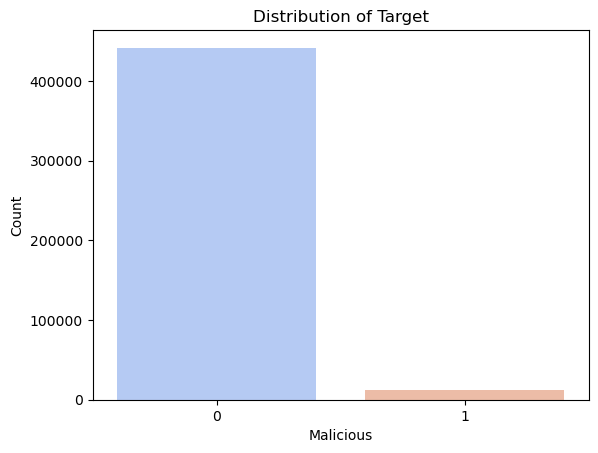

In [122]:
sns.countplot(data=df_combined, x='Malicious', palette='coolwarm')
plt.title("Distribution of Target")
plt.xlabel("Malicious")
plt.ylabel("Count")
plt.show()

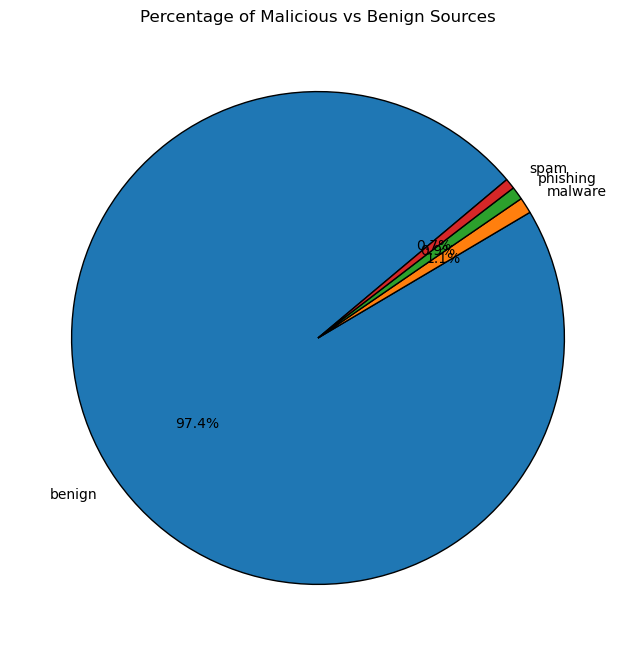

In [137]:
import matplotlib.pyplot as plt



# Step 2: Count occurrences per category
category_counts = df_combined["source"].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=400, wedgeprops={'edgecolor': 'black'})
plt.title("Percentage of Malicious vs Benign Sources")
plt.show()

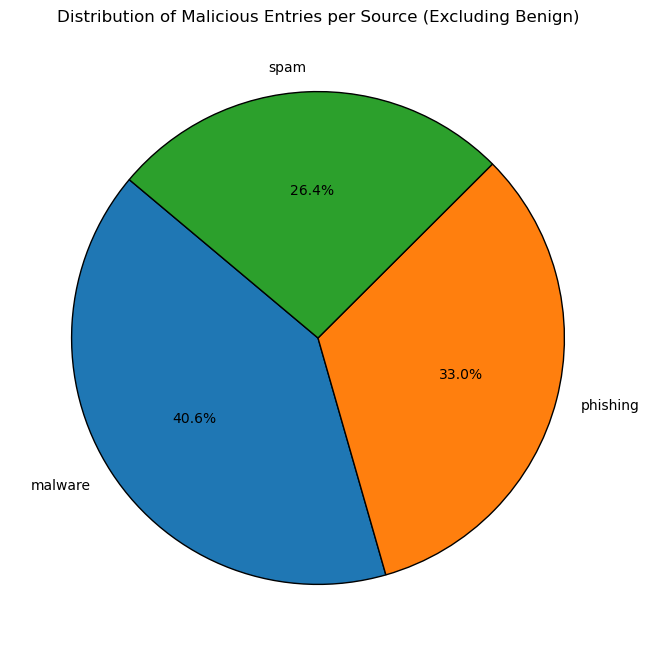

In [147]:
import matplotlib.pyplot as plt

# Step 1: Filter out benign sources
malicious_sources = df_combined[df_combined["source"] != "benign"]["source"].value_counts()

# Step 2: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(malicious_sources, labels=malicious_sources.index, autopct="%1.1f%%", startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Malicious Entries per Source (Excluding Benign)")

# Show the plot
plt.show()


#### Analyze Categorical Features

Malicious         0       1  Malicious_Percentage
Country                                          
nan        214862.0  3835.0              1.753568
US          99840.0  3524.0              3.409311
JP           3089.0   644.0             17.251540
PA           8752.0   351.0              3.855872
CN          19658.0   266.0              1.335073
NL           2158.0   264.0             10.900083
DE           3996.0   226.0              5.352913
BR           4568.0   212.0              4.435146
VG            108.0   208.0             65.822785
SC             81.0   180.0             68.965517
GB           7795.0   167.0              2.097463
IN           4825.0   150.0              3.015075
RU           3367.0   147.0              4.183267
CA           6685.0   142.0              2.079977
FR           6672.0   126.0              1.853486
AU           1596.0   104.0              6.117647
TR           1615.0    83.0              4.888104
HK            760.0    78.0              9.307876


<Axes: xlabel='Country'>

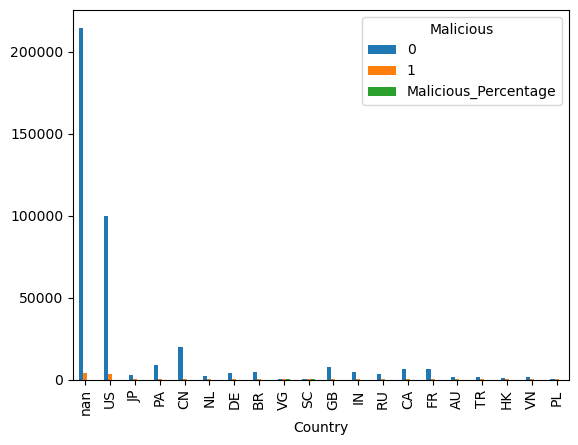

In [165]:
country_dist = df_combined.groupby(['Country', 'Malicious']).size().unstack()
country_dist['Malicious_Percentage'] = (country_dist[1] / country_dist.sum(axis=1)) * 100
print(country_dist.sort_values(by=1, ascending=False, inplace=False).head(20))
country_dist.sort_values(by=1, ascending=False, inplace=False).head(20).plot(kind='bar')



C:\Users\maor9\AppData\Local\Temp\ipykernel_34312\397544561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tld_dist.index[:10], y=tld_dist['Malicious_cnt'][:10], palette="Reds_r")


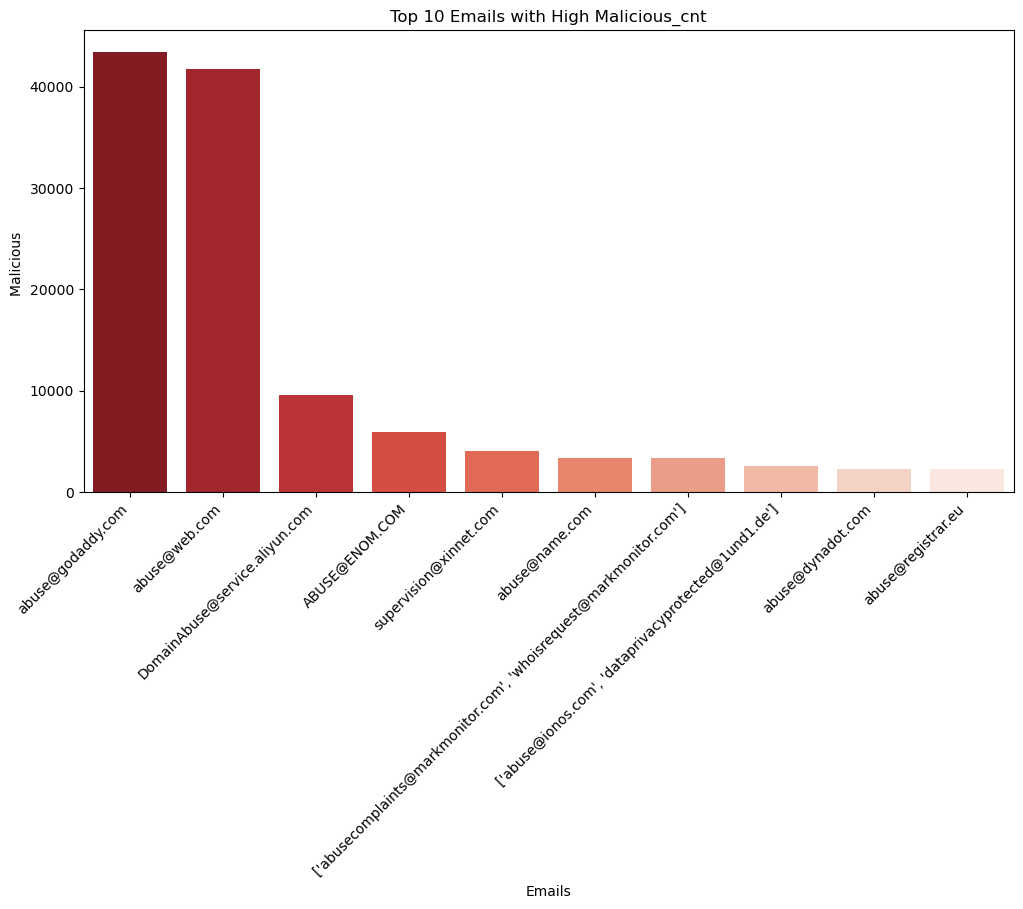

In [167]:
tld_dist =df_combined[df_combined["Emails"].str.contains("@", na=False)].groupby(['Emails', 'Malicious']).size().unstack().fillna(0)
tld_dist['Malicious_cnt'] = tld_dist.sum(axis=1)
tld_dist.sort_values(by='Malicious_cnt', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=tld_dist.index[:10], y=tld_dist['Malicious_cnt'][:10], palette="Reds_r")
plt.title("Top 10 Emails with High Malicious_cnt")
plt.xlabel("Emails")
plt.ylabel("Malicious ")
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\maor9\AppData\Local\Temp\ipykernel_34312\1208360328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_dist.index[:10], y=domain_dist['Malicious_cnt'][:10], palette="Reds_r")


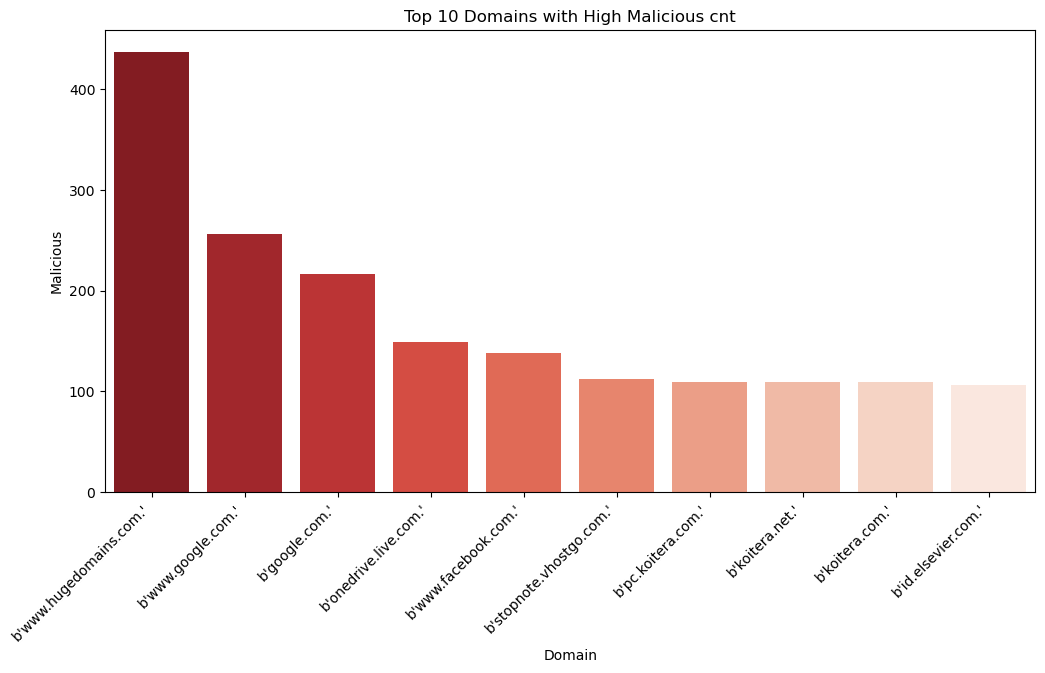

In [171]:
domain_dist = df_combined.groupby(['Domain', 'Malicious']).size().unstack().fillna(0)
domain_dist['Malicious_cnt'] = domain_dist.sum(axis=1)
domain_dist.sort_values(by='Malicious_cnt', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=domain_dist.index[:10], y=domain_dist['Malicious_cnt'][:10], palette="Reds_r")
plt.title("Top 10 Domains with High Malicious cnt")
plt.xlabel("Domain")
plt.ylabel("Malicious")
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\maor9\AppData\Local\Temp\ipykernel_34312\92110614.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_combined["Domain_Age_Binned"], order=labels, palette="coolwarm")


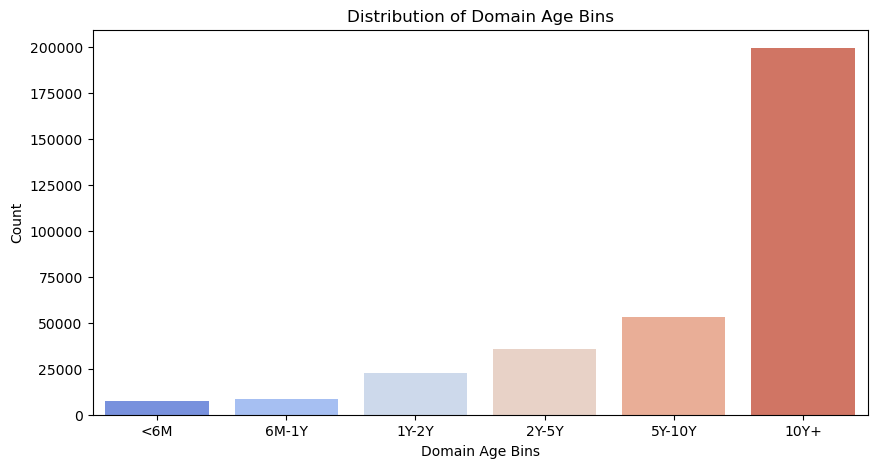

In [175]:
# Ensure 'Domain_Age' column exists and contains numeric values
if "Domain_Age" in df_combined.columns:
    # Extract numeric values from 'Domain_Age' (handles cases like '314 days' -> 314)
    df_combined["Domain_Age_Num"] = df_combined["Domain_Age"].astype(str).str.extract(r'(\d+)').astype(float)

    # Define bins for Domain Age
    bins = [0, 180, 365, 730, 1825, 3650, float("inf")]  # 6-months, 1-year, 2-years, 5-years, 10-years, 10+ years
    labels = ["<6M", "6M-1Y", "1Y-2Y", "2Y-5Y", "5Y-10Y", "10Y+"]
    
    # Create Binned Column
    df_combined["Domain_Age_Binned"] = pd.cut(df_combined["Domain_Age_Num"], bins=bins, labels=labels, include_lowest=True)

    # Display the distribution of bins
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_combined["Domain_Age_Binned"], order=labels, palette="coolwarm")
    plt.title("Distribution of Domain Age Bins")
    plt.xlabel("Domain Age Bins")
    plt.ylabel("Count")
    plt.show()


C:\Users\maor9\AppData\Local\Temp\ipykernel_34312\2017720268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")


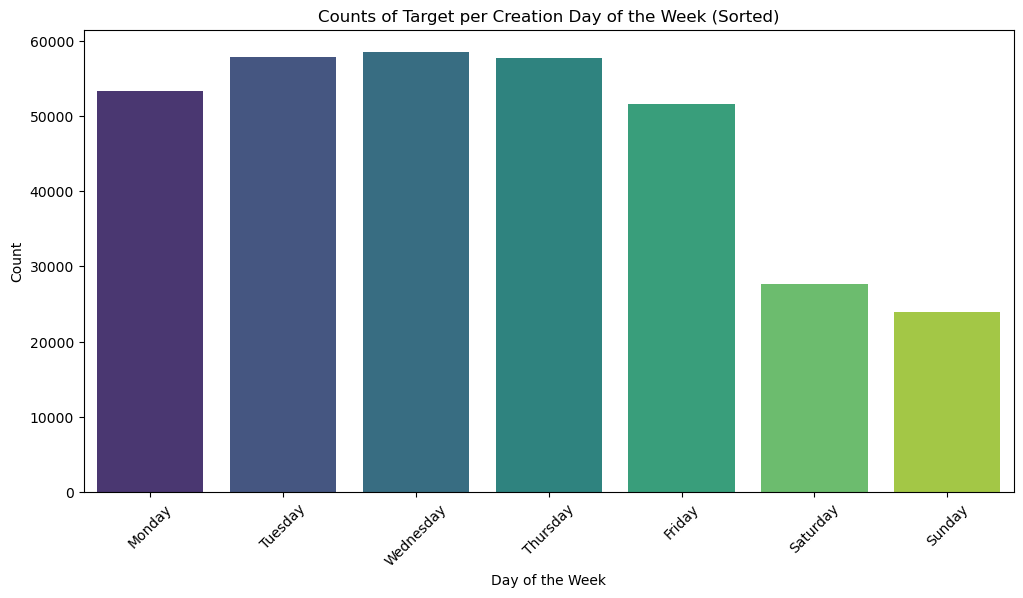

In [179]:
# Plot histogram for counts of target per Creation_DayOfWeek, sorted
if "Creation_DayOfWeek" in df_combined.columns and "Malicious" in df_combined.columns:
    plt.figure(figsize=(12, 6))
    day_counts = df_combined["Creation_DayOfWeek"].value_counts().reindex(
        ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    )
    sns.barplot(x=day_counts.index, y=day_counts.values, palette="viridis")
    plt.title("Counts of Target per Creation Day of the Week (Sorted)")
    plt.xlabel("Day of the Week")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()



#### Numeric columns Analyze

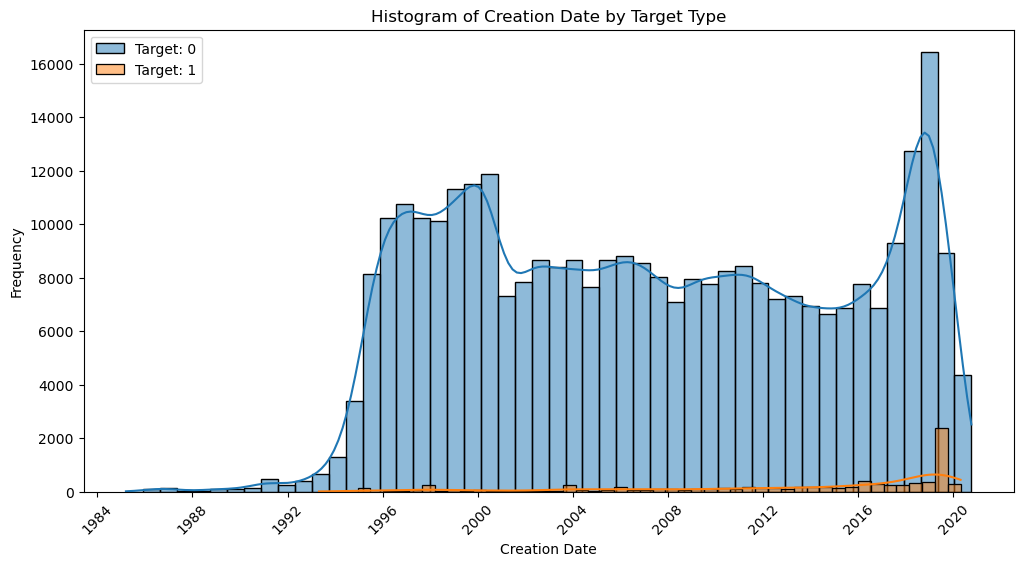

In [187]:
if "Creation_Date_Time" in df_combined.columns:
    df_combined["Creation_Date_Time"] = pd.to_datetime(df_combined["Creation_Date_Time"], errors='coerce')


if "Creation_Date_Time" in df_combined.columns and "Malicious" in df_combined.columns:
    plt.figure(figsize=(12, 6))
    for target in df_combined["Malicious"].unique():
        subset = df_combined[df_combined["Malicious"] == target]
        sns.histplot(subset["Creation_Date_Time"].dropna(), bins=50, label=f"Target: {target}", kde=True)

    plt.title("Histogram of Creation Date by Target Type")
    plt.xlabel("Creation Date")
    plt.ylabel("Frequency")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()



In [200]:

df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453547 entries, 0 to 514337
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Domain_Age             453547 non-null  object        
 1   dec_8                  453547 non-null  object        
 2   Country                453547 non-null  object        
 3   char_distribution      453547 non-null  object        
 4   entropy                453547 non-null  object        
 5   Domain_Name            453547 non-null  object        
 6   source                 453547 non-null  object        
 7   Name_Server_Count      453547 non-null  float64       
 8   Registrar              453547 non-null  object        
 9   Alexa_Rank             453547 non-null  float64       
 10  obfuscate_at_sign      453547 non-null  object        
 11  2gram                  453547 non-null  object        
 12  Domain                 453547 non-null  object   

#### Hour of day

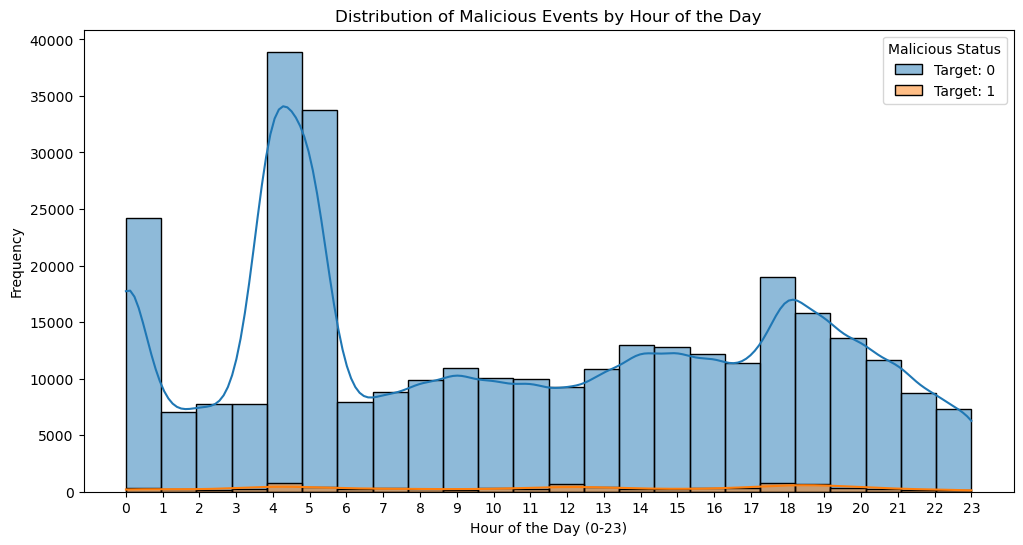

In [229]:
# Plot histogram if both columns exist
if "Hour_of_Day" in df_combined.columns and "Malicious" in df_combined.columns:
    plt.figure(figsize=(12, 6))

    # Loop over unique values in "Malicious" column
    for target in df_combined["Malicious"].unique():
        subset = df_combined[df_combined["Malicious"] == target]  # Filter data by malicious type
        sns.histplot(subset["Hour_of_Day"].dropna(), bins=24, label=f"Target: {target}", kde=True)

    # Formatting the plot
    plt.title("Distribution of Malicious Events by Hour of the Day")
    plt.xlabel("Hour of the Day (0-23)")
    plt.ylabel("Frequency")
    plt.legend(title="Malicious Status")
    plt.xticks(range(0, 24))  # Set x-axis ticks for each hour

    # Show the plot
    plt.show()


#### Correlation Heatmap

In [232]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 453547 entries, 0 to 514337
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Domain_Age             453547 non-null  object        
 1   dec_8                  453547 non-null  object        
 2   Country                453547 non-null  object        
 3   char_distribution      453547 non-null  object        
 4   entropy                453547 non-null  object        
 5   Domain_Name            453547 non-null  object        
 6   source                 453547 non-null  object        
 7   Name_Server_Count      453547 non-null  float64       
 8   Registrar              453547 non-null  object        
 9   Alexa_Rank             453547 non-null  float64       
 10  obfuscate_at_sign      453547 non-null  object        
 11  2gram                  453547 non-null  object        
 12  Domain                 453547 non-null  object   

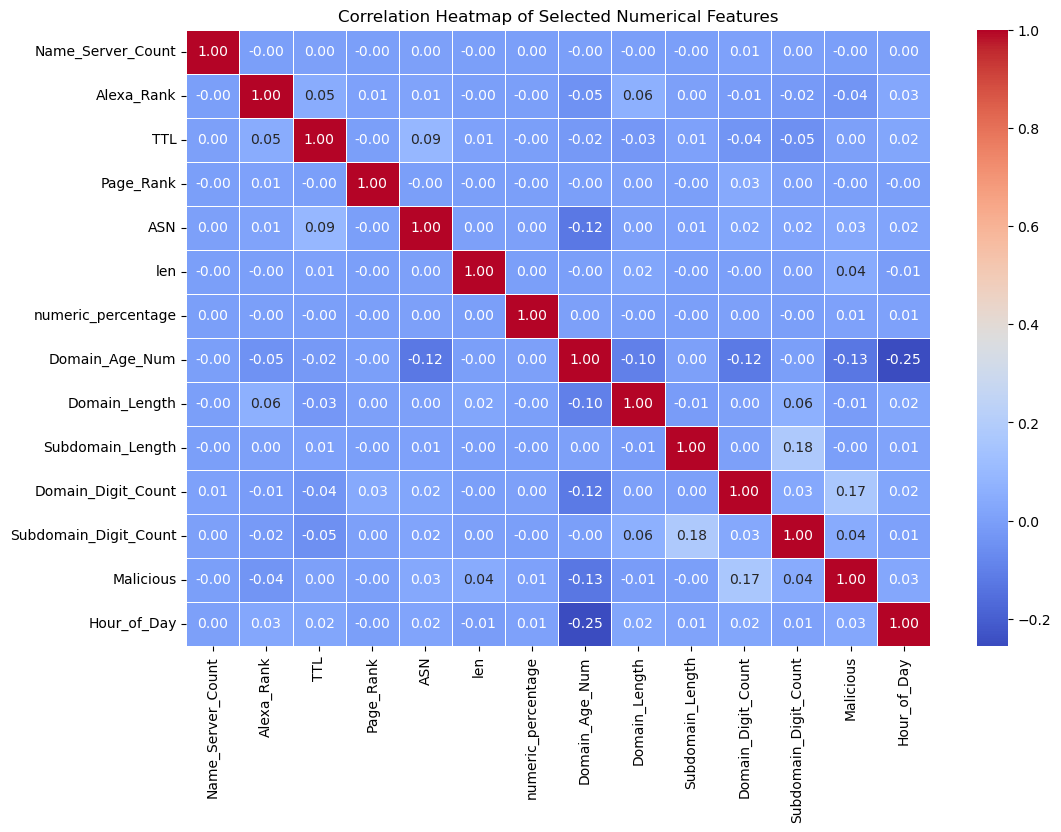

In [234]:

#categorical_columns = df_combined.select_dtypes(include=['object']).columns
numeric_columns = df_combined.select_dtypes(include=['float64','int64']).columns

existing_columns = [col for col in numeric_columns if col in df_combined.columns]

correlation_matrix = df_combined[existing_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Numerical Features")
plt.show()


מאפיינים לקסיקליים (Lexical Features): מאפיינים המבוססים על המבנה וההרכב של שם הדומיין עצמו. לדוגמה, מספר תתי-הדומיינים, אורך שם הדומיין, ושימוש בתווים מיוחדים. מאפיינים אלו מסייעים בזיהוי דומיינים זדוניים המשתמשים בטכניקות כמו "typosquatting" (שימוש בשגיאות כתיב מכוונות) כדי להטעות משתמשים.

מאפיינים סטטיסטיים של DNS (DNS Statistical Features): מאפיינים הנגזרים מהתנהגות התעבורה של פרוטוקול ה-DNS. לדוגמה, ממוצע וסטיית תקן של ערכי ה-Time-to-Live (TTL), מספר ה-TTL הייחודיים, ומספר הכתובות ה-IP השונות המשויכות לדומיין. מאפיינים אלו מסייעים בזיהוי דומיינים עם התנהגות חריגה או חשודה.

מאפיינים מצד שלישי (Third-Party Features): מידע ביוגרפי על הדומיין המתקבל ממקורות חיצוניים, כגון APIs של צד שלישי. לדוגמה, מידע על רישום הדומיין, היסטוריית הדומיין, ומידע על השרתים המארחים. מאפיינים אלו מספקים הקשר נוסף לזיהוי דומיינים זדוניים.

In [ ]:
## בדיקת 3 סוגי מאפיינים : 
 #df_lexical
 #df_dns_stats
 #df_third_party

In [236]:
lexical_features = [
    "longest_word", "Domain_Name", "subdomain", "sld", "entropy", "char_distribution", "2gram", 
    "1gram", "len", "typos", "tld", "shortened", "obfuscate_at_sign", "3gram", 
    "numeric_percentage", "puny_coded", "hex_32", "hex_8", "dec_32", "dec_8"
]

dns_statistical_features = [
    "TTL", "IP", "Name_Server_Count"
]

third_party_features = [
    "Registrant_Name", "Domain_Age", "Emails", "Creation_Date_Time", "Organization", "State", 
    "Country", "Page_Rank", "Registrar", "Alexa_Rank"
]


df_lexical = df_combined[lexical_features].dropna(axis=1, how="all")  
df_dns_stats = df_combined[dns_statistical_features].dropna(axis=1, how="all")
df_third_party = df_combined[third_party_features].dropna(axis=1, how="all")

## dns_stats

In [238]:
#answer section of the DNS responses
if "TTL" in df_combined.columns:
    ttl_summary = {
        "Distinct_TTL_Count": df_combined["TTL"].nunique(),
        "TTL_Mean": df_combined["TTL"].mean(),
        "TTL_Variance": df_combined["TTL"].var()
    }

    df_ttl_summary = pd.DataFrame([ttl_summary])


df_ttl_summary

,Distinct_TTL_Count,TTL_Mean,TTL_Variance
0,12814,4725.245939,4.475893e+07


In [240]:
if "Country" in df_combined.columns:
    ttl_summary = {
        "Distinct_Country_Count": df_combined["Country"].fillna('Unknown').nunique()}

    df_Country_summary = pd.DataFrame([ttl_summary])


df_Country_summary

,Distinct_Country_Count
0,1635


## lexical_features

In [242]:
if "Domain" in df_combined.columns:
    df_combined["Domain_Length"] = df_combined["Domain_Name"].astype(str).apply(len)

if "subdomain" in df_combined.columns:
    df_combined["Subdomain_Length"] = df_combined["subdomain"].astype(str).apply(len)

# Create a summary DataFrame
length_summary = df_combined[["Domain_Length", "Subdomain_Length"]].describe()

length_summary


,Domain_Length,Subdomain_Length
count,453547.000000,453547.000000
mean,19.036409,1.006354
std,24.068452,0.306595
min,1.000000,1.000000
25%,9.000000,1.000000
50%,15.000000,1.000000
75%,28.000000,1.000000
max,2051.000000,46.000000


In [244]:
if "Domain" in df_combined.columns:
    df_combined["Domain_Digit_Count"] = df_combined["Domain"].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

if "subdomain" in df_combined.columns:
    df_combined["Subdomain_Digit_Count"] = df_combined["subdomain"].astype(str).apply(lambda x: sum(c.isdigit() for c in x))

digit_count_summary = df_combined[["Domain_Digit_Count", "Subdomain_Digit_Count"]].describe()

digit_count_summary

,Domain_Digit_Count,Subdomain_Digit_Count
count,453547.000000,453547.000000
mean,0.151667,0.929408
std,0.802976,0.283276
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,66.000000,9.000000


## Model & Plot Feature Importance

#### Transform Data to Train Test Split

In [272]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

if "Malicious" in df_combined.columns:
    df_combined["Malicious"] = df_combined["Malicious"].astype(int)  
    
datetime_cols = df_combined.select_dtypes(include=["datetime64"]).columns
if len(datetime_cols) > 0:
    for col in datetime_cols:
        df_combined[col + "_hour"] = df_combined[col].dt.hour
        df_combined[col + "_day"] = df_combined[col].dt.day
        df_combined[col + "_month"] = df_combined[col].dt.month
        df_combined[col + "_year"] = df_combined[col].dt.year
    df_combined.drop(columns=datetime_cols, inplace=True) 

numerical_columns = df_combined.select_dtypes(include=["number"]).columns.tolist()
categorical_columns = df_combined.select_dtypes(include=["object", "category"]).columns.tolist()

selected_numeric = numerical_columns[:10]  
selected_categorical = categorical_columns[:5]  

selected_numeric = [col for col in selected_numeric if col in df_combined.columns]
selected_categorical = [col for col in selected_categorical if col in df_combined.columns]

X_numeric = df_combined[selected_numeric]

X_categorical = pd.DataFrame()
for col in selected_categorical:
    unique_values = df_combined[col].nunique()
    if unique_values < 100:  
        le = LabelEncoder()
        X_categorical[col] = le.fit_transform(df_combined[col].astype(str))
    else: 
        X_categorical[col] = df_combined.groupby(col)["Malicious"].transform("mean")

X = pd.concat([X_numeric, X_categorical], axis=1)
y = df_combined["Malicious"]

X.replace([np.inf, -np.inf], np.finfo(np.float32).max, inplace=True)  
X = X.clip(lower=np.finfo(np.float32).min, upper=np.finfo(np.float32).max)  
X = X.fillna(-999) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Imbalance Data  -Use  SMOTE (over-sample minority class)

In [274]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


#### Run RandomForest Model

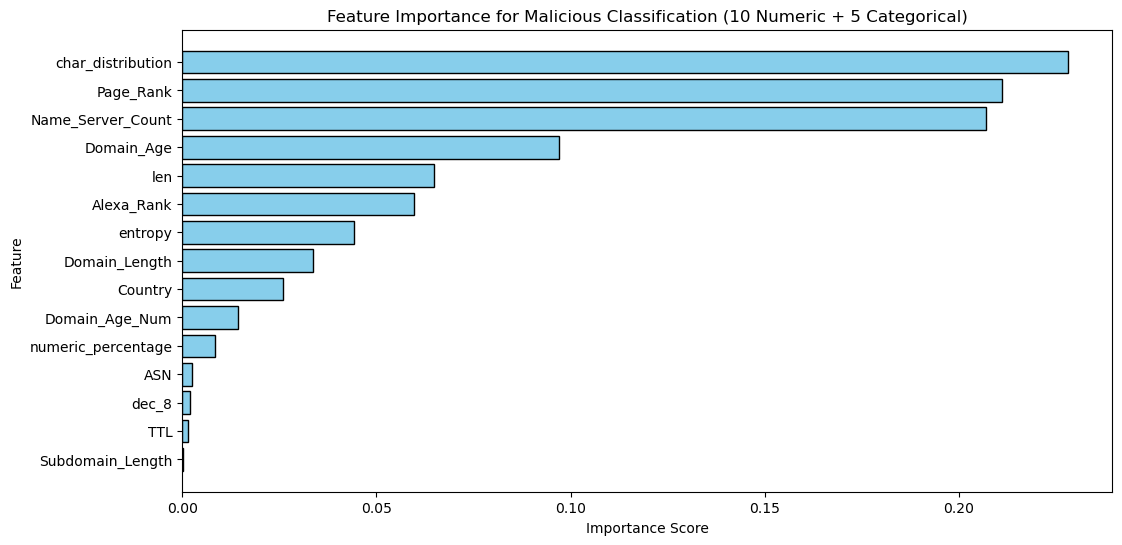

In [276]:

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="skyblue", edgecolor="black")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance for Malicious Classification (10 Numeric + 5 Categorical)")
plt.gca().invert_yaxis()  
plt.show()
